# ** EXPERIMENT 1 -GloVe Model**

In [1]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

## Plot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib as plt

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Other
import re
import string
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

C:\Users\Manasa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import json

# ** IMPORTING DATASET**

In [3]:
import json
with open('NETFLIX_EARRNINGS_CALL_TRANSCRIPT_Q3_2018.json') as json_data:
    data = json.load(json_data)
    print(data)

{'text': {'0': 'Netflix, Inc. (NASDAQ:NFLX) Q3 2018 Earnings Conference Call October 16, 2018  6:00 PM ET', '1': 'Executives', '2': 'Spencer Wang - VP, Finance and Investor Relations', '3': 'Reed Hastings - Co-Founder and Chief Executive Officer', '4': 'David Wells - Chief Financial Officer', '5': 'Greg Peters - Chief Product Officer', '6': 'Ted Sarandos - Chief Content Officer', '7': 'Analysts', '8': 'Eric Sheridan - UBS', '9': 'Spencer Wang', '10': "Good afternoon and welcome to the Netflix Q3 2018 Earnings Interview. I'm Spencer Wang, VP of IR and Corporate Development. Joining me today are CEO, Reed Hastings; CFO, David Wells; Chief Content Officer, Ted Sarandos; and Chief Product Officer, Greg Peters. Our interviewer this quarter is Eric Sheridan from UBS.", '11': 'As a reminder, we will be making forward-looking statements and actual results may vary.', '12': 'With that, over to you now Eric, for the first question.', '13': 'Question-and-Answer Session', '14': 'Q - Eric Sheridan'

In [4]:
transcripts=pd.read_json('NETFLIX_EARRNINGS_CALL_TRANSCRIPT_Q3_2018.json')
#data = pd.read_json('NETFLIX_Q3_2018_EARNINGS_CALL_TRANSCRIPT_FANG.json')
data = pd.DataFrame.sort_index(transcripts)
x = data.text
#x = list(x)
y = data.Sentiments
y = y.values

print(data)
print(x)
print(y)

                                                  text Sentiments
0    Netflix, Inc. (NASDAQ:NFLX) Q3 2018 Earnings C...    Neutral
1                                           Executives    Neutral
2    Spencer Wang - VP, Finance and Investor Relations    Neutral
3    Reed Hastings - Co-Founder and Chief Executive...    Neutral
4                David Wells - Chief Financial Officer    Neutral
5                  Greg Peters - Chief Product Officer    Neutral
6                 Ted Sarandos - Chief Content Officer    Neutral
7                                             Analysts    Neutral
8                                  Eric Sheridan - UBS    Neutral
9                                         Spencer Wang    Neutral
10   Good afternoon and welcome to the Netflix Q3 2...   Positive
11   As a reminder, we will be making forward-looki...    Neutral
12   With that, over to you now Eric, for the first...    Neutral
13                         Question-and-Answer Session    Neutral
14        

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
transcripts


vectorizer = CountVectorizer()
print(vectorizer.fit_transform(transcripts['text']).todense())


Vocabulary=vectorizer.vocabulary_
print(Vocabulary)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'netflix': 721, 'inc': 543, 'nasdaq': 714, 'nflx': 727, 'q3': 884, '2018': 9, 'earnings': 320, 'conference': 221, 'call': 169, 'october': 742, '16': 5, '00': 0, 'pm': 826, 'et': 354, 'executives': 374, 'good': 479, 'afternoon': 46, 'and': 71, 'welcome': 1216, 'to': 1128, 'the': 1098, 'interview': 564, 'spencer': 1016, 'wang': 1203, 'vp': 1200, 'of': 743, 'ir': 576, 'corporate': 240, 'development': 274, 'joining': 586, 'me': 667, 'today': 1129, 'are': 85, 'ceo': 188, 'reed': 909, 'hastings': 502, 'cfo': 191, 'david': 261, 'wells': 1218, 'chief': 197, 'content': 231, 'officer': 747, 'ted': 1083, 'sarandos': 944, 'product': 855, 'greg': 485, 'peters': 807, 'our': 775, 'interviewer': 565, 'this': 1114, 'quarter': 887, 'is': 577, 'eric': 352, 'sheridan': 976, 'from': 450, 'ubs': 1158, 'so': 1000, 'couple': 247, 'questions': 892, 'number': 739, 'one': 751, 'what': 1221, 'h

In [6]:
tokenized_headlines = []
for each in transcripts['text']:
    split = each.split()
    tokenized_headlines.append(split)
tokenized_headlines

[['Netflix,',
  'Inc.',
  '(NASDAQ:NFLX)',
  'Q3',
  '2018',
  'Earnings',
  'Conference',
  'Call',
  'October',
  '16,',
  '2018',
  '6:00',
  'PM',
  'ET'],
 ['Executives'],
 ['Good',
  'afternoon',
  'and',
  'welcome',
  'to',
  'the',
  'Netflix',
  'Q3',
  '2018',
  'Earnings',
  'Interview.',
  "I'm",
  'Spencer',
  'Wang,',
  'VP',
  'of',
  'IR',
  'and',
  'Corporate',
  'Development.',
  'Joining',
  'me',
  'today',
  'are',
  'CEO,',
  'Reed',
  'Hastings;',
  'CFO,',
  'David',
  'Wells;',
  'Chief',
  'Content',
  'Officer,',
  'Ted',
  'Sarandos;',
  'and',
  'Chief',
  'Product',
  'Officer,',
  'Greg',
  'Peters.',
  'Our',
  'interviewer',
  'this',
  'quarter',
  'is',
  'Eric',
  'Sheridan',
  'from',
  'UBS.'],
 ['So',
  'a',
  'couple',
  'questions;',
  'number',
  'one,',
  'what',
  'have',
  'you',
  'learned',
  'in',
  'some',
  'of',
  'the',
  'changes',
  'you',
  'made',
  'in',
  'marketing',
  'this',
  'year?',
  'And',
  'how',
  'do',
  'you',
  '

In [7]:
punctuation = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]
clean_tokenized = []
loweredtokens=[]
for item in tokenized_headlines:
    tokens = []
    for token in item:
        token = token.lower()
        for punc in punctuation:
            token = token.replace(punc, "")
        tokens.append(token)
    clean_tokenized.append(tokens)

In [8]:
import numpy as np
unique_tokens = []
single_tokens = []
for each in clean_tokenized:
    for every in each:
        if every not in unique_tokens:
            unique_tokens.append(every)
counts = pd.DataFrame(0, index=np.arange(len(clean_tokenized)),columns=unique_tokens)


In [9]:
vocabulary_size = len(Vocabulary)
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(transcripts['text'])
sequences = tokenizer.texts_to_sequences(transcripts['text'])
data = pad_sequences(sequences, maxlen=50)

data

array([[  0,   0,   0, ..., 674, 675, 433],
       [  0,   0,   0, ...,   0,   0, 676],
       [252, 677,   2, ...,  42,  36, 437],
       ...,
       [ 22,  68,  60, ..., 129, 315, 662],
       [  0,   0,   0, ...,   0,  26,  42],
       [159,   1, 158, ...,  27, 164, 566]])

In [10]:
# tokenizing the text
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(x)
sequence = tokenizer.texts_to_sequences(x)

In [11]:
index_of_words = tokenizer.word_index
print(len(index_of_words))

1306


In [12]:

print(data.shape)

(176, 50)


In [13]:
padded_seq = pad_sequences(sequence , maxlen = 50)

In [14]:
padded_seq.shape

(176, 50)

In [15]:
#GLOVE MODEL With pretrained glove from kaggle

In [16]:
f = open('glove.6B.100d.txt',encoding='utf8')
embedd_index = {}
for line in f:
    val = line.split()
    word = val[0]
    coff = np.asarray(val[1:],dtype = 'float')
    embedd_index[word] = coff

f.close()
print('Found %s word vectors.' % len(embedd_index))


Found 400000 word vectors.


In [17]:
Y = y

In [18]:
for n,i in enumerate(Y):
    if i == 'Neutral' :
        Y[n] = 0
    elif i == 'Positive':
        Y[n] = 1
    else:
        Y[n] = -1

In [19]:
from sklearn.cross_validation import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(padded_seq,Y ,train_size = 0.8)

C:\Users\Manasa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [20]:
embedding_matrix = np.zeros((len(index_of_words) + 1, 100))

print(embedding_matrix)

tokens = []
labels = []

for word,i in index_of_words.items():
    temp = embedd_index.get(word)
    if temp is not None:
        embedding_matrix[i] = temp

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
model = Sequential()
model.add(Embedding(1307,100,input_length=50,weights = [embedding_matrix]))
model.add(LSTM(100, dropout = 0.2 , recurrent_dropout = 0.2))
#model.add(GlobalMaxPooling1D())
#odel.add(Dense(30,activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy' , optimizer = 'sgd' , metrics = ['accuracy'])
hist = model.fit(X_train,Y_train,epochs = 50 , batch_size = 512)

Epoch 1/50
140/140 [==============================] - 1s 7ms/step - loss: 0.6839 - acc: 0.5643
Epoch 2/50
140/140 [==============================] - 0s 962us/step - loss: 0.6940 - acc: 0.5571
Epoch 3/50
140/140 [==============================] - 0s 1ms/step - loss: 0.6808 - acc: 0.5643
Epoch 4/50
140/140 [==============================] - 0s 1ms/step - loss: 0.6860 - acc: 0.6286
Epoch 5/50
140/140 [==============================] - 0s 1ms/step - loss: 0.6912 - acc: 0.5786
Epoch 6/50
140/140 [==============================] - 0s 1ms/step - loss: 0.6814 - acc: 0.5929
Epoch 7/50
140/140 [==============================] - 0s 1ms/step - loss: 0.6948 - acc: 0.5643
Epoch 8/50
140/140 [==============================] - 0s 1ms/step - loss: 0.6816 - acc: 0.6357
Epoch 9/50
140/140 [==============================] - 0s 1ms/step - loss: 0.6680 - acc: 0.5857
Epoch 10/50
140/140 [==============================] - 0s 1ms/step - loss: 0.6613 - acc: 0.6214
Epoch 11/50
140/140 [==========================

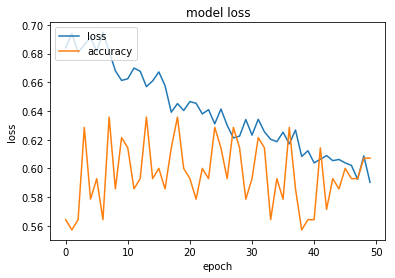

In [22]:
plt.plot(hist.history['loss'])  
plt.plot(hist.history['acc'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['loss', 'accuracy'], loc='upper left')  
plt.show()

In [26]:
prediction = model.predict(X_test)
prediction

array([[0.48216602],
       [0.46911177],
       [0.48452374],
       [0.36853278],
       [0.48234114],
       [0.35142067],
       [0.40676826],
       [0.40676826],
       [0.47334003],
       [0.35475156],
       [0.4446195 ],
       [0.35475156],
       [0.46570966],
       [0.45595792],
       [0.42851394],
       [0.43401343],
       [0.4983531 ],
       [0.51833296],
       [0.35475156],
       [0.43445542],
       [0.439058  ],
       [0.4571077 ],
       [0.35142067],
       [0.35142067],
       [0.46096784],
       [0.40293923],
       [0.42620727],
       [0.4156306 ],
       [0.40532416],
       [0.38987362],
       [0.35475156],
       [0.47709936],
       [0.35142067],
       [0.48112434],
       [0.4851998 ],
       [0.37926337]], dtype=float32)

In [24]:
scores=model.evaluate(X_test,Y_test)
print('Test accuracy', scores[1])

36/36 [==============================] - 0s 5ms/step
Test accuracy 0.5833333333333334


In [ ]:
non_binary_values = prediction[(prediction['score'] != 1) & (prediction['score'] != 0)]
non_binary_idxs = prediction[(prediction['score'] != 1) & (prediction['score'] != 0)].index

#cnf=model.evaluate(Y_test, prediction.round())

# Confusion Matrix

In [ ]:
#Test data confusion matrix

In [35]:
test_y=np.int8(Y_test)

In [36]:
pred_test=np.int8(prediction.round())
pred_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int8)

In [30]:
from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(test_y,pred_test)
print(cm_test)

[[ 0  1  0]
 [ 0 21  1]
 [ 0 13  0]]


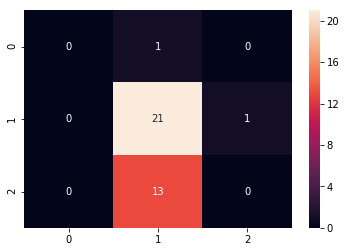

In [34]:
import seaborn as sn
sn.heatmap(cm_test, annot=True)

In [ ]:
#Train Confusion matrix

In [ ]:
prediction_train = model.predict(X_train)
prediction_train

In [ ]:
train_y=np.int8(Y_train)

In [ ]:
pred_train=np.int8(prediction_train)

In [ ]:
cm_train=confusion_matrix(train_y,pred_train)
print(cm_train)